In [1]:
import pandas as pd

# Bibliotecas de geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

,time,s4
0,2018-09-04 14:10:00,0.220
1,2018-09-04 14:11:00,0.187
2,2018-09-04 14:12:00,0.193
3,2018-09-04 14:13:00,0.186
4,2018-09-04 14:14:00,0.168
...,...,...
16425,2018-09-15 23:55:00,0.165
16426,2018-09-15 23:56:00,0.157
16427,2018-09-15 23:57:00,0.153
16428,2018-09-15 23:58:00,0.154


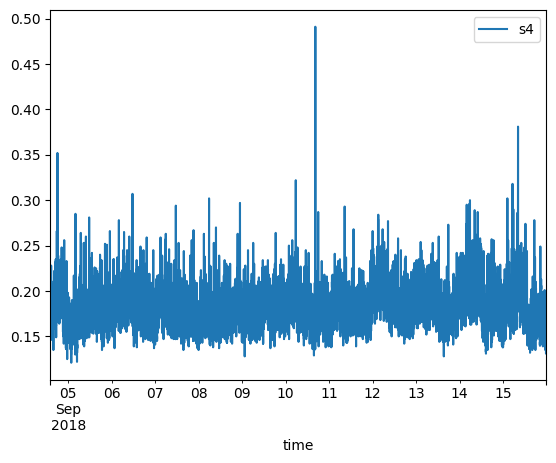

In [15]:
data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-09-01_2018-09-15_9464c9cda8dce80d71af4c0f7524355bEDITADO.csv', na_values=[' ', ''])

data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[data['time_utc']>='2018-09-04 14:10:00']
data = data[data[' svid'] == 131]
data = data[['time_utc', ' s4']]
data.columns = ['time', 's4']
data['s4'] = data['s4'].astype(float)
data.reset_index(drop=True, inplace=True)
data.plot(x='time', y='s4')
data.interpolate('linear')

In [3]:
x = data.drop(["s4"], axis=1)
y = data["s4"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

train_x = x_train
train_y = y_train

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print("Atributos: Treino", x_train.shape, "Teste", x_test.shape)
print("Valores: Treino", y_train.shape, "Teste", y_test.shape)

Atributos: Treino (11501, 1) Teste (4929, 1)
Valores: Treino (11501,) Teste (4929,)


In [ ]:
gbr = GradientBoostingRegressor(criterion="squared_error", random_state=42) 
gbr.fit(x_train, y_train)

y_predict = gbr.predict(x_test)
mean_squared_error(y_predict, y_test)

0.0003554269538798088

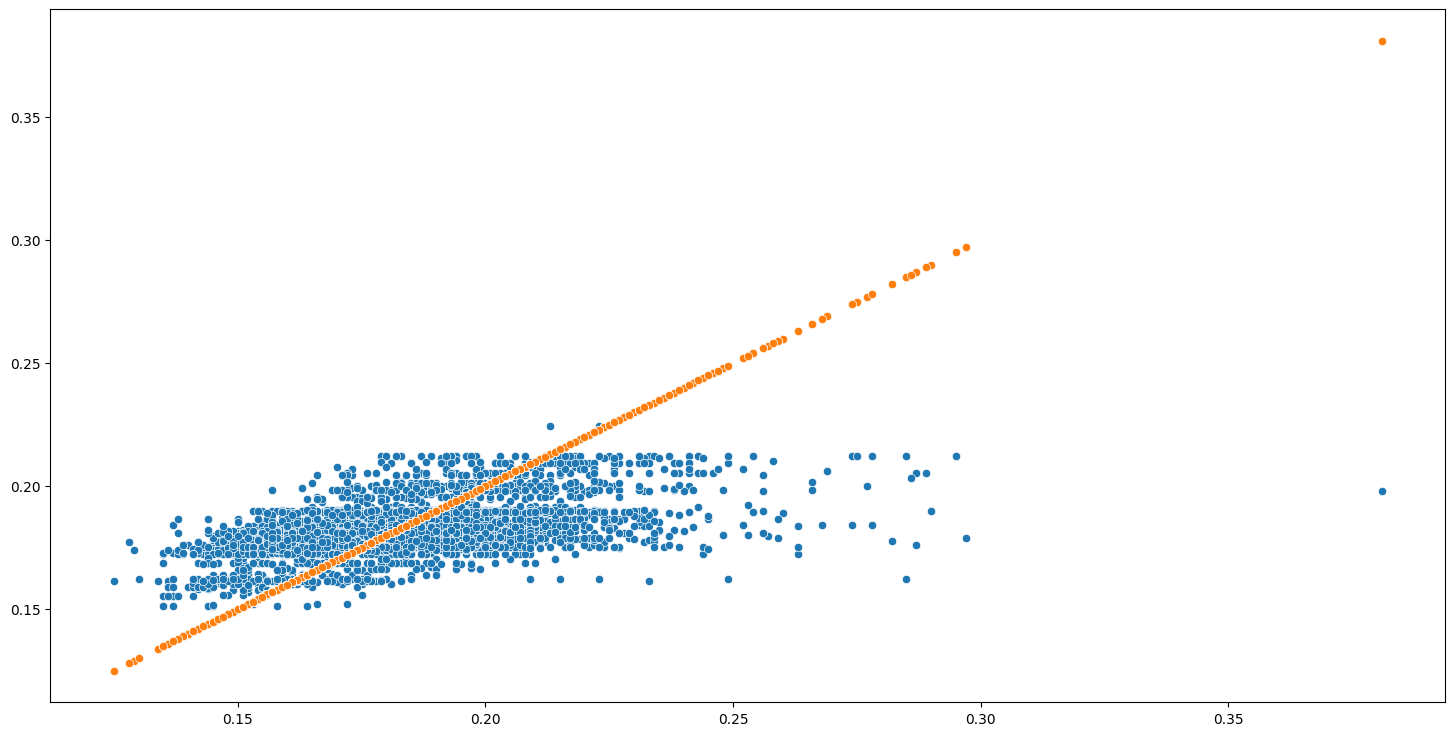

array([0.182, 0.153, 0.187, ..., 0.145, 0.175, 0.147])

In [5]:
plt.figure(figsize=(18, 9))

sns.scatterplot(x=y_test, y=y_predict)
sns.scatterplot(x=y_test, y=y_test)

# plt.savefig("gbr_scatter.svg", formatstr="svg")
plt.show()
y_train

In [12]:
from skopt import gp_minimize
from skopt.utils import use_named_args

def fitness(params):
    learning_rate = params[0]
    n_estimators = params[1]
    min_samples_split = params[2]
    min_samples_leaf = params[3]

    model_gbr = GradientBoostingRegressor(learning_rate=learning_rate,
                                        n_estimators=n_estimators,
                                        min_samples_split=min_samples_split.astype(int),
                                        min_samples_leaf=min_samples_leaf.astype(int),
                                        random_state=42)

    model_gbr.fit(x_train, y_train)
    gbr_predict = model_gbr.predict(x_test)
    return mean_squared_error(y_test, gbr_predict)

space = [(1e-2, 1e-1), # learning_rate
         (1, 1000), # n_estimators
         (2, 100), # min_samples_split
         (1, 100)] # min_samples_leaf, # subsample, # max_features

resultado_gp = gp_minimize(fitness, space, random_state=42, n_calls=20, n_random_starts=10, verbose=1)

print(resultado_gp.x)
print(resultado_gp.fun)



from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

param_distributions = {
   "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
   "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
   "learning_rate": [0.01, 0.1, 1],
 }

# pipe_gbr = Pipeline(steps=[
# #    ("preprocessor", preprocessor),
#    ("classifier", GradientBoostingRegressor(random_state=42))
#  ])

gs_gbr = (GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_distributions, scoring='neg_mean_squared_error'))

gs_gbr = gs_gbr.fit(train_x, train_y)
gs_gbr.best_estimator_

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.8896
Function value obtained: 0.0003
Current minimum: 0.0003
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4214
Function value obtained: 0.0004
Current minimum: 0.0003
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.0856
Function value obtained: 0.0004
Current minimum: 0.0003
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0142
Function value obtained: 0.0005
Current minimum: 0.0003
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0361
Function value obtained: 0.0004
Current minimum: 0.0003
Iteration No: 6 started. Evaluating

GradientBoostingRegressor(max_leaf_nodes=10, n_estimators=1000, random_state=42)

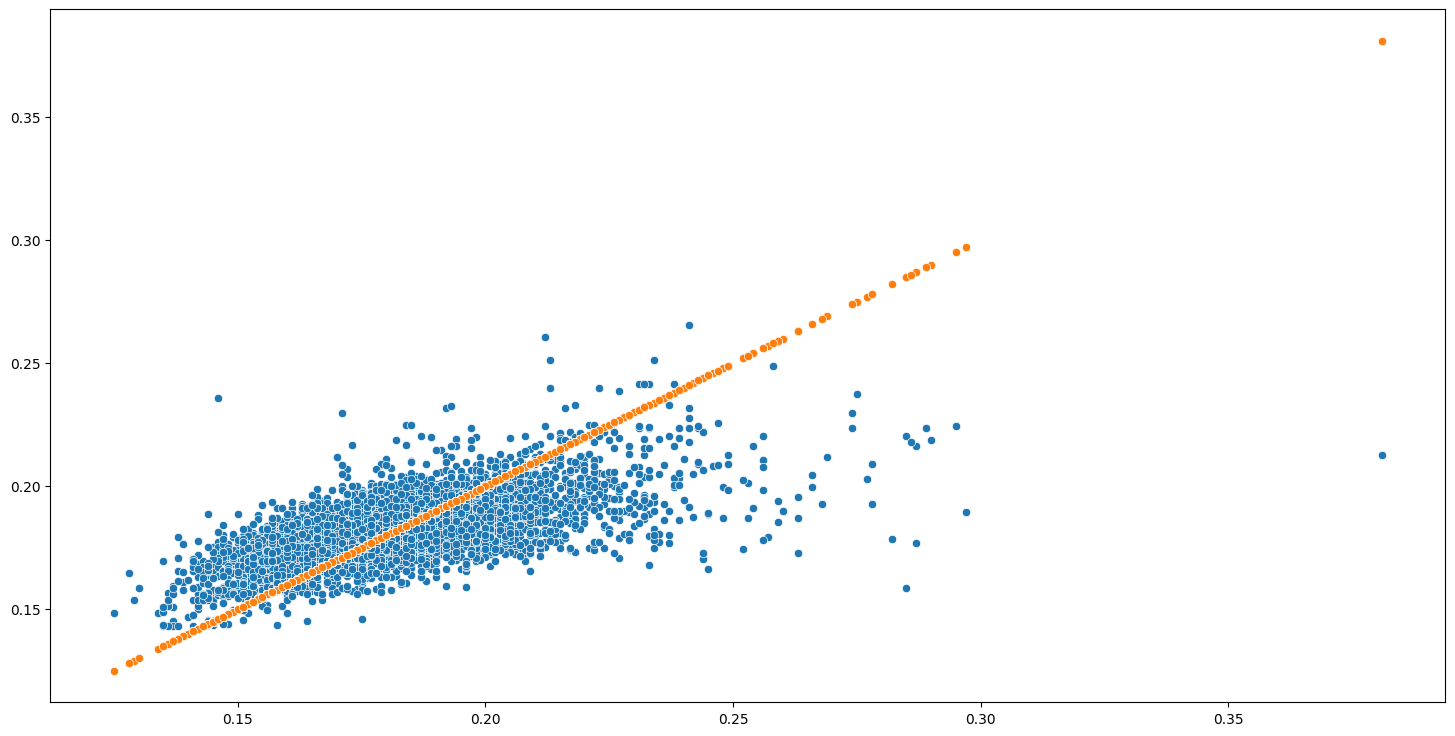

In [13]:
clf = GradientBoostingRegressor(max_leaf_nodes=10, n_estimators=1000, random_state=42)

clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
mean_squared_error(y_predict, y_test)

plt.figure(figsize=(18, 9))

sns.scatterplot(x=y_test, y=y_predict)
sns.scatterplot(x=y_test, y=y_test)

# plt.savefig("gbr_scatter.svg", formatstr="svg")
plt.show()